# **Лабораторна робота 5: Використання Boosting моделей для прогнозування**
**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Лабораторні роботи де в коді буде використаня КИРИЛИЦІ будуть оцінюватись в 20 балів.**

#### **Мета роботи:**
Ознайомитись з принципами роботи Boosting моделей, навчитися застосовувати три різні Boosting алгоритми (AdaBoost, Gradient Boosting, XGBoost) для розв'язання задач прогнозування, налаштовувати параметри моделей, зокрема параметри регуляризації, для підвищення їх продуктивності.

#### **Завдання:**

1. **Підготовка даних**:
   - Завантажте та підготуйте датасет для регресії або класифікації: (наприклад, **[дані про ціни на житло](https://)** або **[діабет](https://www.kaggle.com/datasets/pkdarabi/diabetes-dataset-with-18-features)**). Розбийте дані на навчальну та тестову вибірки (наприклад, 80/20).
   
2. **Побудова трьох Boosting моделей**:
   - **AdaBoost**: Побудуйте модель на базі дерев рішень як базових моделей.
   - **Gradient Boosting**: Використайте бібліотеку Scikit-learn для створення Gradient Boosting моделі для прогнозування.
   - **XGBoost**: Використайте бібліотеку XGBoost для побудови більш оптимізованої моделі.

3. **Навчання та оцінка моделей**:
   - Для кожної моделі виведіть метрики оцінки, такі як точність (classification accuracy) або середньоквадратична помилка (MSE) для регресії.
   - Побудуйте графіки навчання для візуалізації процесу.

4. **Тонке налаштування параметрів (Hyperparameter Tuning)**:
   - Для кожної моделі налаштуйте наступні параметри:
     - **AdaBoost**: Кількість базових моделей (n_estimators), learning_rate.
     - **Gradient Boosting**: Максимальна глибина дерев (max_depth), кількість дерев (n_estimators), learning_rate.
     - **XGBoost**: Кількість дерев (n_estimators), learning_rate, max_depth, subsample.
   - Використайте крос-валідацію для підбору оптимальних параметрів.

5. **Регуляризація**:
   - Додайте **L1 та L2 регуляризацію** для Gradient Boosting та XGBoost моделей (в XGBoost параметри `alpha` для L1 та `lambda` для L2).
   - Виведіть результати з регуляризацією і порівняйте з результатами без регуляризації.

6. **Порівняння моделей**:
   - Проведіть порівняння трьох моделей за основними метриками продуктивності на тестових даних.
   - Проаналізуйте, як регуляризація впливає на результати моделей. В яких випадках вона покращує модель, а в яких — погіршує.

7. **Захист роботи**:
   - Поясніть, яку модель і чому ви вважаєте найкращою для вирішення вашої задачі.
   - Опишіть, як впливала регуляризація на продуктивність моделей, та що б ви змінили в параметрах для кращого результату.

#### **Додаткові вимоги:**
- Забезпечити відображення важливості ознак у кожній з моделей (feature importance).
- Побудувати графіки для візуалізації залежності продуктивності від зміни гіперпараметрів (наприклад, залежність від кількості дерев або learning_rate).


#### **Додаткові набори даних:**

1. **Diabetes Dataset** — містить медичні дані пацієнтів, які можуть бути використані для прогнозування наявності діабету. Він доступний за посиланням: [Diabetes Dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set).

2. **Diabetes Health Indicators Dataset** — великий датасет з понад 250 тисячами записів, який містить індикатори здоров'я для визначення ризику діабету. Підходить для класифікаційних задач. Доступний за посиланням: [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset).

3. **California Housing Prices** — датасет, що містить інформацію про ціни на житло у різних округах штату Каліфорнія, включаючи такі параметри, як середній дохід домогосподарств, кількість мешканців тощо. Він добре підходить для регресійних моделей. Доступний за посиланням: [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

4. **House Prices - Advanced Regression Techniques** — більш комплексний датасет, який використовується для вдосконалення регресійних моделей. Включає більше 70 ознак, що описують різні аспекти нерухомості, ідеальний для глибокого аналізу та тонкого налаштування моделей. Доступний тут: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

Ці набори даних ви також можете використовувати для виконання завдань Лабораторної роботи 5.

AdaBoost Accuracy: 0.9419279907084785
GradientBoosting Accuracy: 0.9442508710801394
XGBoost Accuracy: 0.943089430894309
Without regularization: {'accuracy': 0.943089430894309, 'precision': 0.9433962264150944, 'recall': 0.8438818565400844, 'f1': 0.89086859688196, 'roc_auc': 0.9123255436546575}
З L1 regularization: {'accuracy': 0.9419279907084785, 'precision': 0.943127962085308, 'recall': 0.8396624472573839, 'f1': 0.8883928571428571, 'roc_auc': 0.9102158390133074}
З L2 regularization: {'accuracy': 0.943089430894309, 'precision': 0.9433962264150944, 'recall': 0.8438818565400844, 'f1': 0.89086859688196, 'roc_auc': 0.9123255436546575}


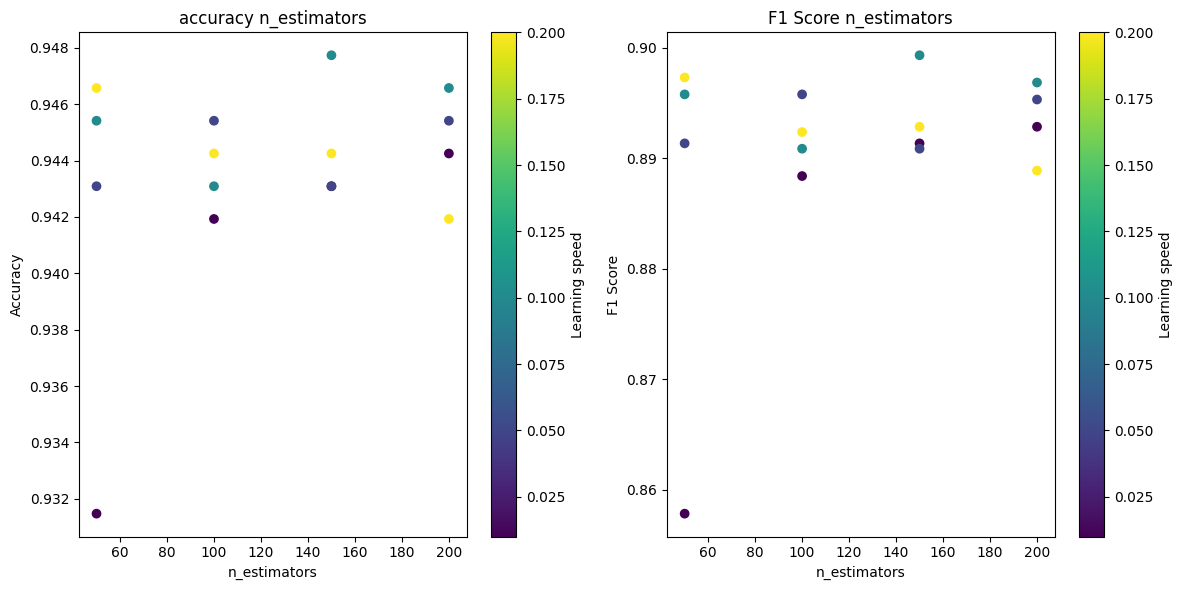

In [20]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

data = pd.read_csv("diabetes.csv")
X = data.drop(columns='Diabetes')
y = data['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'AdaBoost': AdaBoostClassifier(n_estimators=50, learning_rate=1.0, algorithm='SAMME'),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3),
    'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy:", accuracy_score(y_test, y_pred))

param_grid = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 1.0]}
grid_search = GridSearchCV(AdaBoostClassifier(algorithm='SAMME'), param_grid, cv=5)
grid_search.fit(X_train, y_train)

xgb_models = {
    'Without regularization': XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    'З L1 regularization': XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, alpha=0.1, random_state=42),
    'З L2 regularization': XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, reg_lambda=1, random_state=42)
}

for label, model in xgb_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics = evaluate_model(y_test, y_pred)
    print(f"{label}:", metrics)

def evaluate_model(y_true, y_pred):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred),
        'roc_auc': roc_auc_score(y_true, y_pred)
    }

def test_hyperparameters(n_estimators_list, learning_rate_list):
    results = {'n_estimators': [], 'learning_rate': [], 'accuracy': [], 'f1': []}
    
    for n in n_estimators_list:
        for lr in learning_rate_list:
            model = XGBClassifier(n_estimators=n, learning_rate=lr, max_depth=3, random_state=42)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            
            metrics = evaluate_model(y_test, y_pred)
            results['n_estimators'].append(n)
            results['learning_rate'].append(lr)
            results['accuracy'].append(metrics['accuracy'])
            results['f1'].append(metrics['f1'])
    
    return results

n_estimators_list = [50, 100, 150, 200]
learning_rate_list = [0.01, 0.05, 0.1, 0.2]

results = test_hyperparameters(n_estimators_list, learning_rate_list)

n_estimators_array = np.array(results['n_estimators'])
learning_rate_array = np.array(results['learning_rate'])
accuracy_array = np.array(results['accuracy'])
f1_array = np.array(results['f1'])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(n_estimators_array, accuracy_array, c=learning_rate_array, cmap='viridis', label='accuracy')
plt.colorbar(label='Learning speed')
plt.title('accuracy n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.scatter(n_estimators_array, f1_array, c=learning_rate_array, cmap='viridis', label='F1 Score')
plt.colorbar(label='Learning speed')
plt.title('F1 Score n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('F1 Score')

plt.tight_layout()
plt.show()



In [ ]:
The model without regularization and the model with L2 regularization showed the same results across all metrics. Both achieve an accuracy of 94.3% and have the highest F1 score (0.8909) and ROC-AUC (0.9123).

The model with L1 regularization demonstrated slightly worse results: its accuracy is 94.19%, and the F1 and ROC-AUC scores have also slightly decreased